# PROJECT 2 PART EDA

In [46]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook

## 2001

In [47]:
# Load the data from your .csv.gz file into a new DataFrame.
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001.info()
df_2001.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1358 non-null   object 
 1   adult                  1357 non-null   float64
 2   backdrop_path          747 non-null    object 
 3   belongs_to_collection  97 non-null     object 
 4   budget                 1357 non-null   float64
 5   genres                 1357 non-null   object 
 6   homepage               107 non-null    object 
 7   id                     1357 non-null   float64
 8   original_language      1357 non-null   object 
 9   original_title         1357 non-null   object 
 10  overview               1330 non-null   object 
 11  popularity             1357 non-null   float64
 12  poster_path            1227 non-null   object 
 13  production_companies   1357 non-null   object 
 14  production_countries   1357 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.320,1237.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [48]:
filter_budget = df['budget'] >0
filter_budget.sum()

531

In [49]:
filter_revenue = df['revenue'] >0
filter_revenue.sum()

492

In [50]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

430

In [51]:
# Remove any movies with 0's for budget AND revenue from the remaining visualizations.
df_2001 = df[filter_financial]
df_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.424,1911.0,R
5,tt0120804,0.0,/l5KvxFVOru3Qyf3dl2asNw5g1MD.jpg,"{'id': 17255, 'name': 'Resident Evil Collectio...",33000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",https://www.sonypictures.com/movies/residentevil,1576.0,en,Resident Evil,...,102984862.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A secret experiment. A deadly virus. A fatal m...,Resident Evil,0.0,6.611,5843.0,R
6,tt0120912,0.0,/o1l6OCqA3pYDZHIc5L1s7CEzCMv.jpg,"{'id': 86055, 'name': 'Men In Black Collection...",140000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.sonypictures.com/movies/meninblackii,608.0,en,Men in Black II,...,445135288.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Back in black.,Men in Black II,0.0,6.359,9293.0,PG-13
7,tt0121765,0.0,/abwxHfymXGAbbH3lo9PDEJEfvtW.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,1894.0,en,Star Wars: Episode II - Attack of the Clones,...,649398328.0,142.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,0.0,6.550,12347.0,PG
8,tt0133240,0.0,/mVuH9hNGnxF9bbhlh1Tr9FuG3Uc.jpg,NaN,140000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,9016.0,en,Treasure Planet,...,109578115.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find your place in the universe.,Treasure Planet,0.0,7.531,3834.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,tt0364385,0.0,/3ZDkl8rsoLe6g4FRV9alNH5sZOt.jpg,"{'id': 1972, 'name': 'Ju-on Collection', 'post...",3500000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,11838.0,ja,呪怨,...,3657876.0,92.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,When a grudge from the dead passes to the livi...,Ju-on: The Grudge,0.0,6.684,708.0,R
1138,tt0365960,0.0,/ahXtNFVHtFxvjphZN8QlHRVsu9W.jpg,NaN,20000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,27090.0,en,Zero Day,...,8466.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,"In high school, you're told you can do anythin...",Zero Day,0.0,7.400,79.0,NaN
1225,tt0757920,0.0,/sOkmFOVcDmH2P4GU9Mvyc4ZBC3D.jpg,NaN,10000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,44078.0,fa,Dokhtar-e shirini-foroosh,...,10000.0,105.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Pastry Girl,0.0,1.000,1.0,NaN
1241,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN


## 2002

In [52]:
# Load the data from your .csv.gz file into a new DataFrame.
df_2002 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
df_2002.info()
df_2002.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1295 non-null   object 
 1   adult                  1294 non-null   float64
 2   backdrop_path          775 non-null    object 
 3   belongs_to_collection  120 non-null    object 
 4   budget                 1294 non-null   float64
 5   genres                 1294 non-null   object 
 6   homepage               106 non-null    object 
 7   id                     1294 non-null   float64
 8   original_language      1294 non-null   object 
 9   original_title         1294 non-null   object 
 10  overview               1262 non-null   object 
 11  popularity             1294 non-null   float64
 12  poster_path            1183 non-null   object 
 13  production_companies   1294 non-null   object 
 14  production_countries   1294 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,...,0.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Crime and Punishment,0.0,5.300,12.0,NaN
2,tt0118926,0.0,/qR3Dk3ctnrrxkAI6I472RhamIbu.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,...,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.200,51.0,R
3,tt0119980,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,563364.0,en,Random Shooting in LA,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Random Shooting in LA,0.0,0.000,0.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.424,1911.0,R


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [53]:
filter_budget = df_2002['budget'] >0
filter_budget.sum()

316

In [54]:
filter_revenue = df_2002['revenue'] >0
filter_revenue.sum()

277

In [55]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

215

## Load and prepare data

In [56]:
df_to_combine = [df_2001, df_2002]
df = pd.concat(df_to_combine)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 4 to 1294
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1725 non-null   object 
 1   adult                  1724 non-null   float64
 2   backdrop_path          1197 non-null   object 
 3   belongs_to_collection  222 non-null    object 
 4   budget                 1724 non-null   float64
 5   genres                 1724 non-null   object 
 6   homepage               194 non-null    object 
 7   id                     1724 non-null   float64
 8   original_language      1724 non-null   object 
 9   original_title         1724 non-null   object 
 10  overview               1692 non-null   object 
 11  popularity             1724 non-null   float64
 12  poster_path            1611 non-null   object 
 13  production_companies   1724 non-null   object 
 14  production_countries   1724 non-null   object 
 15  rele

In [57]:
df.head(5), df.tail(5)

(     imdb_id  adult                     backdrop_path  \
 4  tt0120679    0.0  /s04Ds4xbJU7DzeGVyamccH4LoxF.jpg   
 5  tt0120804    0.0  /l5KvxFVOru3Qyf3dl2asNw5g1MD.jpg   
 6  tt0120912    0.0  /o1l6OCqA3pYDZHIc5L1s7CEzCMv.jpg   
 7  tt0121765    0.0  /abwxHfymXGAbbH3lo9PDEJEfvtW.jpg   
 8  tt0133240    0.0  /mVuH9hNGnxF9bbhlh1Tr9FuG3Uc.jpg   
 
                                belongs_to_collection       budget  \
 4                                                NaN   12000000.0   
 5  {'id': 17255, 'name': 'Resident Evil Collectio...   33000000.0   
 6  {'id': 86055, 'name': 'Men In Black Collection...  140000000.0   
 7  {'id': 10, 'name': 'Star Wars Collection', 'po...  120000000.0   
 8                                                NaN  140000000.0   
 
                                               genres  \
 4  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
 5  [{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...   
 6  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   


In [58]:
#Display the number of rows and columns
df.shape

(1725, 26)

In [59]:
# Desplay statistics
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,1724.000000,1.724000e+03,1.724000e+03,1724.000000,1.724000e+03,1724.000000,1724.00000,1724.000000,1724.000000
mean,0.001740,1.163698e+07,1.334245e+05,9.565585,2.877127e+07,96.755800,0.00406,5.037294,659.961717
std,0.041691,2.430620e+07,2.132649e+05,14.266492,9.120684e+07,26.995197,0.06361,2.319484,2057.420993
min,0.000000,0.000000e+00,6.400000e+01,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.154400e+04,1.400000,0.000000e+00,89.000000,0.00000,4.429000,3.000000
50%,0.000000,0.000000e+00,4.020950e+04,4.101000,0.000000e+00,96.000000,0.00000,5.791500,23.500000
75%,0.000000,1.000000e+07,1.594582e+05,12.860750,1.183282e+07,108.000000,0.00000,6.582000,327.000000
max,1.000000,1.400000e+08,1.197023e+06,131.942000,9.262874e+08,185.000000,1.00000,10.000000,20508.000000


In [60]:
#Display non-null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 4 to 1294
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1725 non-null   object 
 1   adult                  1724 non-null   float64
 2   backdrop_path          1197 non-null   object 
 3   belongs_to_collection  222 non-null    object 
 4   budget                 1724 non-null   float64
 5   genres                 1724 non-null   object 
 6   homepage               194 non-null    object 
 7   id                     1724 non-null   float64
 8   original_language      1724 non-null   object 
 9   original_title         1724 non-null   object 
 10  overview               1692 non-null   object 
 11  popularity             1724 non-null   float64
 12  poster_path            1611 non-null   object 
 13  production_companies   1724 non-null   object 
 14  production_countries   1724 non-null   object 
 15  rele

## Questions to Explore

How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [61]:
df_budget = df.loc[(df['budget']>0 )| (df["revenue"])]

df_budget.shape

(808, 26)

In [62]:
print(f"There are {len(df)} movies with valid budget/revenue.")

There are 1725 movies with valid budget/revenue.


How many movies are there in each of the certification categories (G/PG/PG-13/R)?

NaN      934
R        406
PG-13    238
PG        71
NR        49
G         23
NC-17      4
Name: certification, dtype: int64

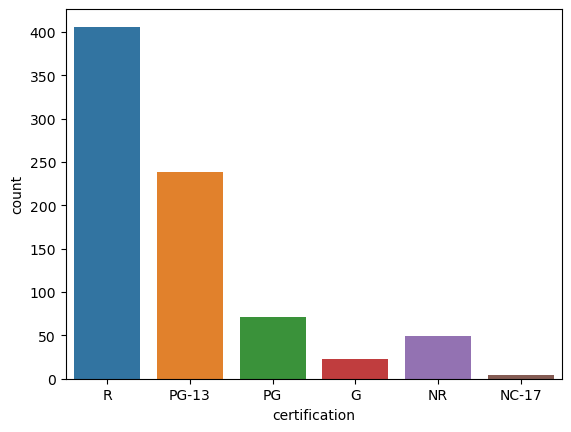

In [63]:
sns.countplot(data=df, x='certification');
df['certification'].value_counts(dropna=False)

What is the average revenue per certification category?

certification
G        $ 88,321,545
NC-17             $ 0
NR          $ 445,434
PG      $ 168,122,934
PG-13    $ 96,581,653
R        $ 23,631,359
Name: revenue, dtype: float64

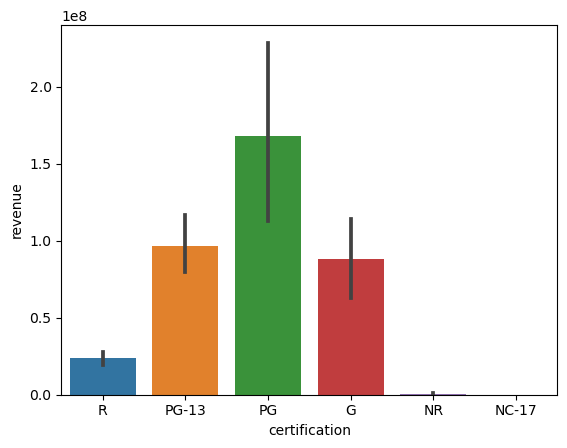

In [64]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['revenue'].mean())

sns.barplot(data=df, x='certification', y='revenue');

What is the average budget per certification category?

certification
G       $ 40,956,522
NC-17            $ 0
NR         $ 797,694
PG      $ 41,482,042
PG-13   $ 36,180,852
R       $ 15,593,579
Name: budget, dtype: float64

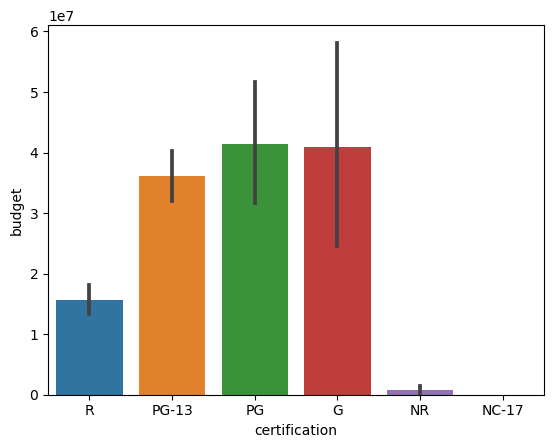

In [65]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['budget'].mean())

sns.barplot(data=df, x='certification', y='budget');

In [67]:
# Save dataframe
df_budget.to_csv(f"Data/tmdb_results_combined.csv.gz", 
                                   compression='gzip', index=False)